In [1]:
import numpy as np
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
sig_stack_tot = [0 for i in range(270)]
for i in range(270):
    sig_stack_tot[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/stacks/sig/sig'+str(i)+'.npy')

In [3]:
for_stack_tot = [0 for i in range(270)]
for i in range(270):
    for_stack_tot[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/stacks/for/for'+str(i)+'.npy')

In [4]:
np.shape(sig_stack_tot)

(270, 50, 50)

In [5]:
sig_stack_avg = np.nanmean(sig_stack_tot, axis = 0)
for_stack_avg = np.nanmean(for_stack_tot, axis = 0)

In [7]:
beam_res = 1
stack_dim = 0.28

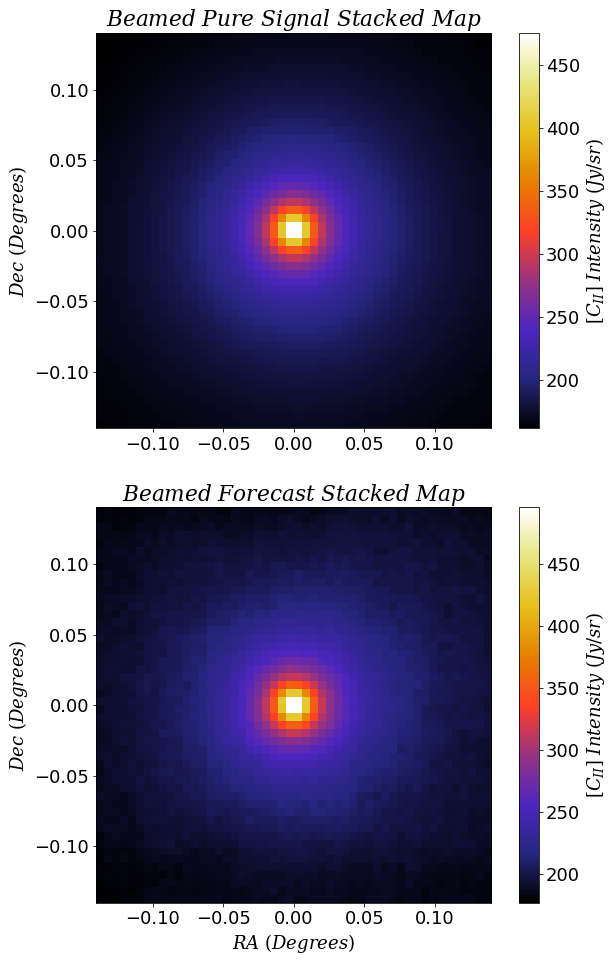

In [9]:
fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(sig_stack_avg, beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(for_stack_avg, cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.savefig('Stacking/jul31_270GHz_n50_avg.png', bbox_inches = "tight")

plt.show()

In [146]:
def radial_profile(data):
    
    ## data = (n, n) shape
    
    n = len(data)
    
    center_y = int(n/2)
    center_x = center_y
    
    center = (center_x, center_y)
    
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    return radialprofile

In [147]:
rad_sig = radial_profile(sig_stack_avg)
rad_for = radial_profile(for_stack_avg)

In [134]:
len(rad_for)

79

In [150]:
deg_per_pix = 0.28/50 # stack_dim/n
deg_away = np.linspace(0, (len(rad_sig) - 1)*deg_per_pix, len(rad_sig))

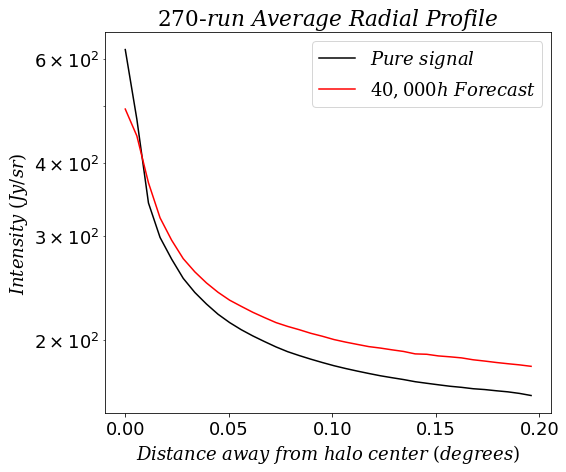

In [151]:
plt.plot(deg_away, rad_sig, 'k', label = r'$Pure\ signal$')
plt.plot(deg_away, rad_for, 'r', label = r'$40,000h\ Forecast$')

plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
plt.ylabel(r'$Intensity\ (Jy/sr)$')

plt.yscale('log')

plt.legend(bbox_to_anchor = (1,1))
#plt.savefig('Stacking/rprofile_tobs40kh_270run-avg_z6.png', bbox_inches = 'tight')

In [152]:
rad_sig_tot = [0 for i in range(270)]
rad_for_tot = [0 for i in range(270)]

for i in range(270):
    
    rad_sig_tot[i] = radial_profile(sig_stack_tot[i])
    rad_for_tot[i] = radial_profile(for_stack_tot[i])

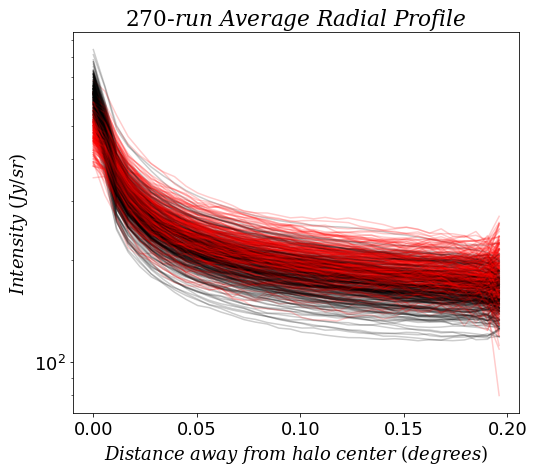

In [153]:
for i in range(270):
    
    plt.plot(deg_away, rad_sig_tot[i], 'k', label = r'$Pure\ signal$', alpha = 0.2)
    plt.plot(deg_away, rad_for_tot[i], 'r', label = r'$40,000h\ Forecast$', alpha = 0.2)

    plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
    plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
    plt.ylabel(r'$Intensity\ (Jy/sr)$')

    plt.yscale('log')

    #plt.legend(bbox_to_anchor = (1,1))

In [155]:
err_rsig = np.std(rad_sig_tot, axis = 0)
err_rfor = np.std(rad_for_tot, axis = 0)

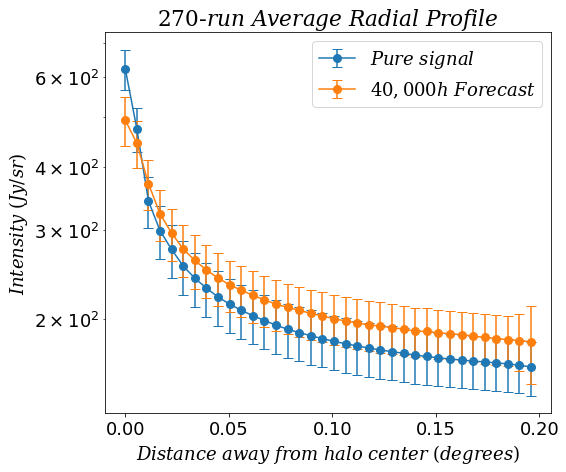

In [170]:
plt.errorbar(deg_away, rad_sig, yerr = err_rsig, fmt = '-o', markersize = 8, capsize = 5, label = r'$Pure\ signal$')
plt.errorbar(deg_away, rad_for, yerr = err_rfor, fmt = '-o', markersize = 8, capsize = 5, label = r'$40,000h\ Forecast$')
#plt.set_markeredgewidth(1)

plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
plt.ylabel(r'$Intensity\ (Jy/sr)$')

plt.yscale('log')

plt.legend(bbox_to_anchor = (1,1))
#plt.savefig('Stacking/rprofile_tobs40kh_270run-avg_z6.png', bbox_inches = 'tight')

HOD Ly$\alpha$ emitters:

In [173]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


I want to look into halos at $z$ = 6.6, that is at $\nu_{obs} \sim$ 250 GHz:

In [365]:
m_cii.update(model_par = {'zdex': 0.4,
                            'M0': 1900000000.0,
                            'Mmin': 20000000000,
                            'alpha_MH1': 0.74,
                            'alpha_LCII': 0.024,
                            'BehrooziFile': 'sfr_reinterp.dat'},
               tobs = 40000*u.h,
               nuObs = 270*u.GHz,
               Delta_nu = 40*u.GHz,
               Omega_field = 4*(u.deg**2),
               dnu = 2.8*u.GHz,
               catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'
            )

In [364]:
1897/(5.9+1)

274.92753623188406

In [366]:
m_halos = m_cii.halos.M

Loading .npz catalogues...


In [211]:
def n_mh(m_h, logm_min, sigma_logm, alpha, dc):
    
    log_m1p = 1.18*logm_min - 1.28
    log_m0 = 0.76*log_m1p + 2.3
    
    m_1p = 10**(log_m1p)
    m_0 = 10**(log_m0)
    
    
    n_c = (1/2)*(1 + special.erf((np.log10(m_h) - logm_min)/sigma_logm))
    n_s = (n_c)*((m_h - m_0)/m_1p)**alpha
    
    n = dc*(n_c + n_s)
                 
    return n_c             

In [212]:
log_m_min = 9.1
sigma_log_m = 0.2
alph = 1
dutyc = 0.9*(10**(-4))

In [213]:
n_mh_z6 = n_mh(m_halos, log_m_min, sigma_log_m, alph, dutyc) 

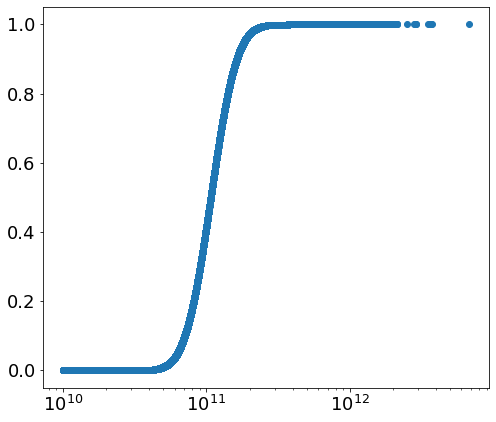

In [214]:
plt.scatter(m_halos, n_mh_z6)
plt.xscale('log')

In [207]:
# old HOD that worked...
log_Mmin = 11.03 # new one for z = 6.6: 9.1. old one for z = 5.9: 11.03
sig_logM = 0.2

In [208]:
def N_c(M_h, sig, logM_min):
    
    return (1/2)*(1 + math.erf((np.log10(M_h) - logM_min)/(sig)))

In [209]:
N_cen = [0 for i in range(len(m_halos))]
for i in range(len(m_halos)):
    N_cen[i] = N_c(m_halos[i], sig_logM, log_Mmin)

Text(0.5, 1.0, '$N_{cen}(M_{halo})$')

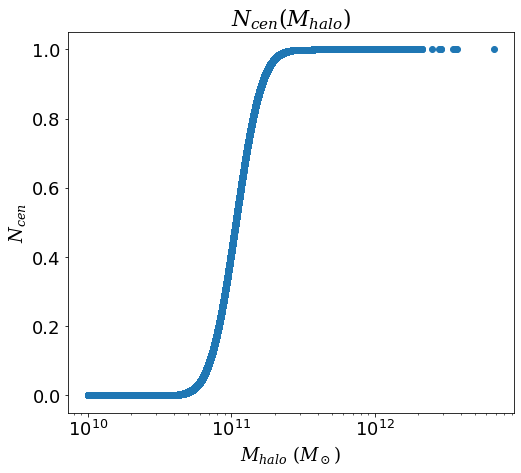

In [210]:
plt.scatter(m_halos, N_cen)
plt.xscale('log')
plt.xlabel(r'$M_{halo}\ (M_\odot)$')
plt.ylabel(r'$N_{cen}$')
plt.title(r'$N_{cen}(M_{halo})$')

It doesn't work because that value for $log(M_{min})$ is for halos at z = 6.6 ! Need to select the good halos:

In [367]:
map_zs = (m_cii.mapinst.nu_rest/m_cii.mapinst.nu_bincents) - 1
ind = 7
err = 0.1
z_sel = 5.9

In [368]:
halo_zs = m_cii.halos.redshift

In [369]:
good_halo_zs = np.where(np.logical_and(halo_zs >= z_sel - err, halo_zs <= z_sel + err))

In [273]:
halo_zpos = halo_zs[good_halo_zs]

In [274]:
pixcents_z_mesh, halo_zs_mesh = np.meshgrid(map_zs, halo_zpos)
halo_centpix_z = np.argmin(np.abs(halo_zs_mesh - pixcents_z_mesh), axis=1)

Before:

Text(0, 0.5, '$Count$')

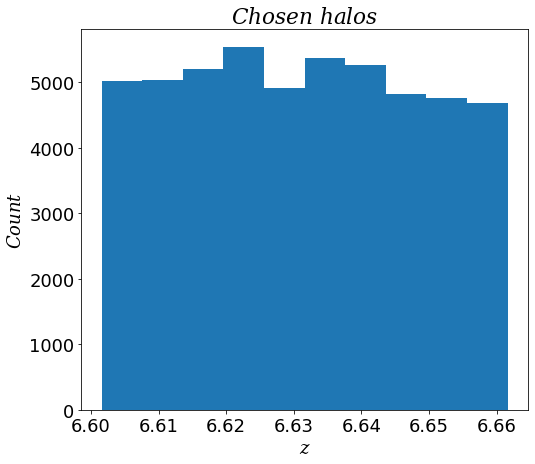

In [267]:
plt.hist(halo_zpos)
plt.title(r'$Chosen\ halos$')
plt.xlabel(r'$z$')
plt.ylabel(r'$Count$')

([<matplotlib.axis.XTick at 0x7efbf5af84f0>], [Text(7, 0, '6.63')])

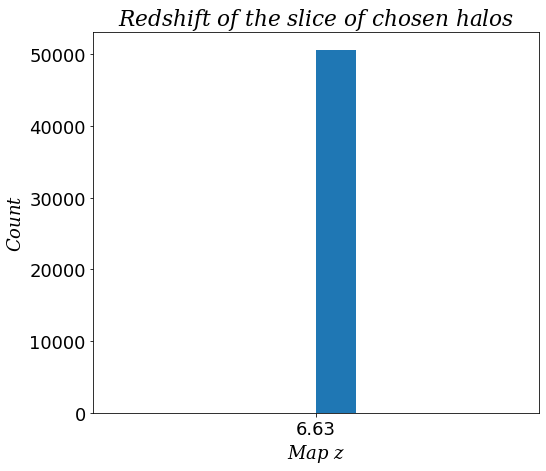

In [268]:
plt.hist(halo_centpix_z)
plt.title(r'$Redshift\ of\ the\ slice\ of\ chosen\ halos$')
plt.xlabel(r'$Map\ z$')
plt.ylabel(r'$Count$')
plt.xticks([7], labels = [6.63])

New idea:

Text(0, 0.5, '$Count$')

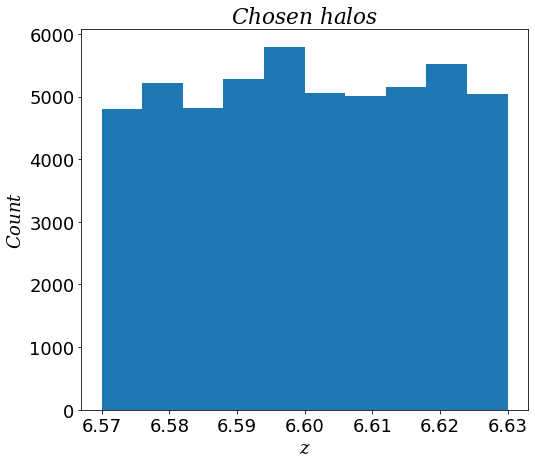

In [275]:
plt.hist(halo_zpos)
plt.title(r'$Chosen\ halos$')
plt.xlabel(r'$z$')
plt.ylabel(r'$Count$')

([<matplotlib.axis.XTick at 0x7efbf55a0ac0>,
 [Text(6, 0, '6.54'), Text(7, 0, '6.63')])

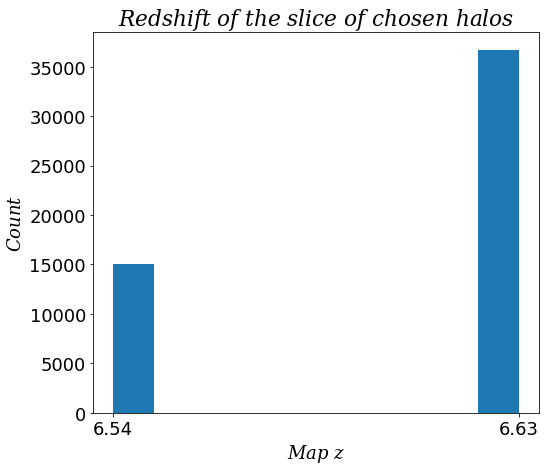

In [277]:
plt.hist(halo_centpix_z)
plt.title(r'$Redshift\ of\ the\ slice\ of\ chosen\ halos$')
plt.xlabel(r'$Map\ z$')
plt.ylabel(r'$Count$')
plt.xticks([6, 7], labels = [round(map_zs[6], 2), round(map_zs[7], 2)])

Back to LBGs: select halo masses that we want:

In [370]:
halo_ms = m_cii.halos.M[good_halo_zs]

In [307]:
def n_mh(m_h, logm_min, sigma_logm, alpha, dc):
    
    log_m1p = 1.18*logm_min - 1.28
    log_m0 = 0.76*log_m1p + 2.3
    
    m_1p = 10**(log_m1p)
    m_0 = 10**(log_m0)
    
    
    n_c = (1/2)*(1 + special.erf((np.log10(m_h) - logm_min)/sigma_logm))
    n_s = (n_c)*((m_h - m_0)/m_1p)**alpha
    
    n = dc*(n_c + n_s)
                 
    return n_c, n_s, n

In [350]:
log_m_min = 11.03
sigma_log_m = 0.2
alph = 1
dutyc = 0.6

In [354]:
halo_m_arr = np.logspace(10, 12, 100)

In [355]:
n_cen, n_sat, n_tot = n_mh(halo_m_arr, log_m_min, sigma_log_m, alph, dutyc) 

Text(0.5, 1.0, '$N_{cen}(M_{halo})$')

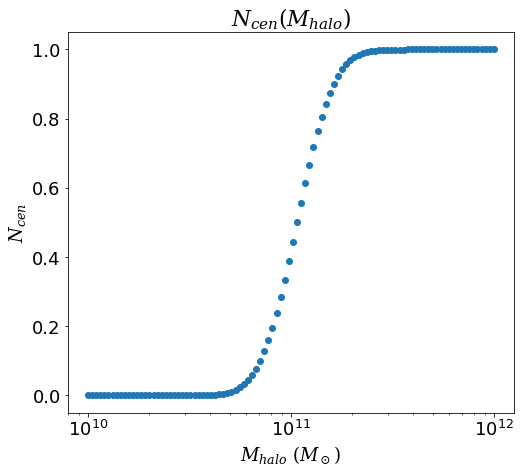

In [356]:
plt.scatter(halo_m_arr, n_cen)
plt.xscale('log')
plt.xlabel(r'$M_{halo}\ (M_\odot)$')
plt.ylabel(r'$N_{cen}$')
plt.title(r'$N_{cen}(M_{halo})$')
#plt.yticks([0.99999999999, 1])

Text(0.5, 1.0, '$N_{sat}(M_{halo})$')

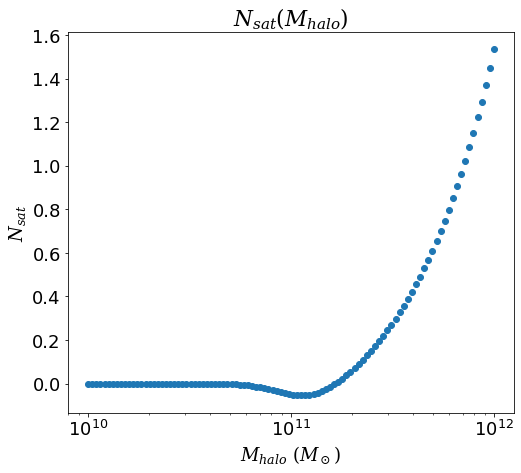

In [358]:
plt.scatter(halo_m_arr, n_sat)
plt.xscale('log')
plt.xlabel(r'$M_{halo}\ (M_\odot)$')
plt.ylabel(r'$N_{sat}$')
plt.title(r'$N_{sat}(M_{halo})$')

Text(0.5, 1.0, '$N_{tot}(M_{halo})$')

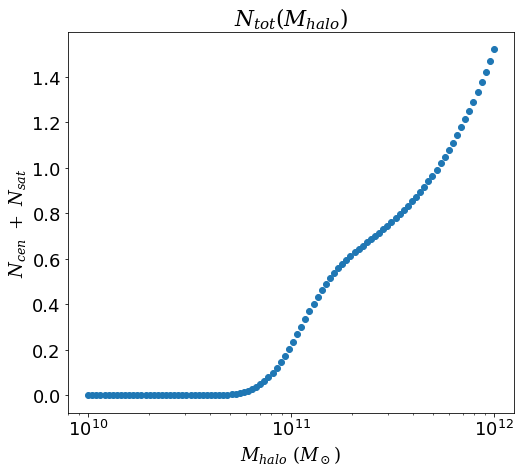

In [359]:
plt.scatter(halo_m_arr, n_tot)
plt.xscale('log')
plt.xlabel(r'$M_{halo}\ (M_\odot)$')
plt.ylabel(r'$N_{cen}\ +\ N_{sat}$')
plt.title(r'$N_{tot}(M_{halo})$')

In [371]:
n_cen_tot, n_sat_tot, n_tot_tot = n_mh(halo_ms, log_m_min, sigma_log_m, alph, dutyc) 

In [372]:
poiss_draw = np.random.poisson(n_tot_tot)

In [375]:
np.shape(n_tot_tot)

(388752,)

In [377]:
np.shape(poiss_draw)

(388752,)

In [373]:
np.sum(poiss_draw)

5949

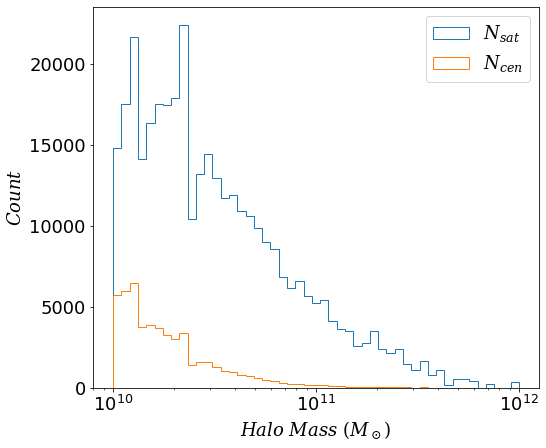

In [321]:
plt.hist(halo_ms, weights = n_sat, bins = np.logspace(10, 12, 50), histtype='step', label = r'$N_{sat}$')
plt.hist(halo_ms, weights = n_cen, bins = np.logspace(10, 12, 50), histtype='step', label = r'$N_{cen}$')
plt.xscale('log')
plt.xlabel(r'$Halo\ Mass\ (M_\odot)$')
plt.ylabel(r'$Count$')
plt.legend()

Does it relate to my stacked map?

In [322]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [332]:
for i in range(len(onlyfiles)):
    if onlyfiles[i] == m_cii.catalogue_file:
        print(i)
        ind_cat = i

81


In [333]:
onlyfiles[ind_cat]

'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'

In [329]:
m_cii.catalogue_file

'/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'

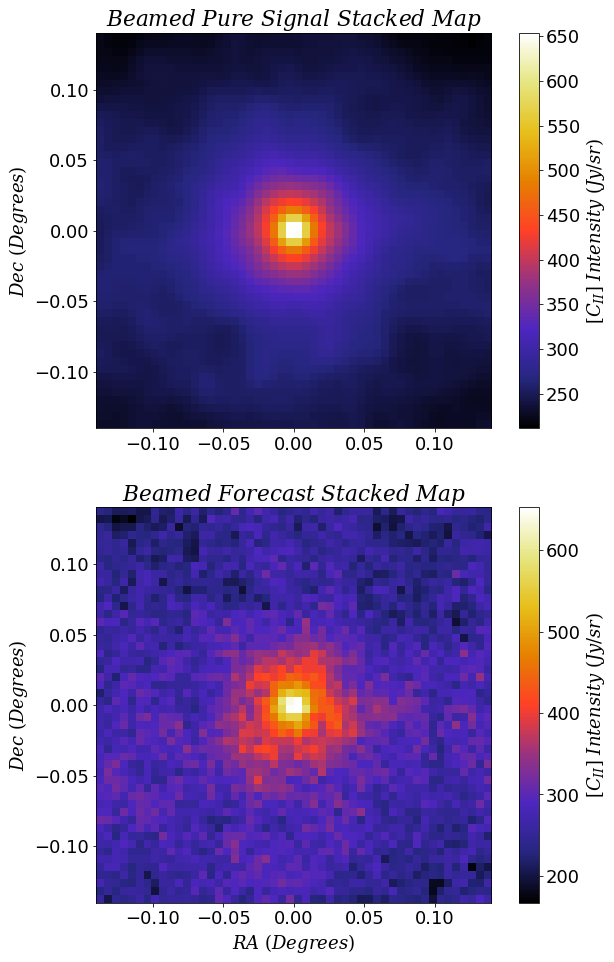

In [334]:
fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(sig_stack_tot[ind_cat], beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(for_stack_tot[ind_cat], cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')

Debug:

In [1]:
from stacking_params import *
plt.rcParams["mathtext.fontset"] = "dejavuserif"


# Calculating luminosities

halo_ms = lim_sim.halos.M

mthresh = halo_ms > mass_cut

map_zs = (lim_sim.mapinst.nu_rest/lim_sim.mapinst.nu_bincents) - 1

halo_zs = lim_sim.halos.redshift[mthresh]
good_halo_zs = np.where(np.logical_and(halo_zs >= z_sel - err, halo_zs <= z_sel + err))

halo_xs = lim_sim.halos.ra[mthresh][good_halo_zs]
halo_ys = lim_sim.halos.dec[mthresh][good_halo_zs]
halo_zs = halo_zs[good_halo_zs]

n_gal_tot = n_mh(halo_ms[mthresh][good_halo_zs], log_m_min, sigma_log_m, alph, dutyc)
draws = np.random.poisson(n_gal_tot)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation
Loading .npz catalogues...


In [2]:
print('------------------------')
print(' - The total forecast observing time has been set to', t_obs, '-')
print(' - The redshift of selected halos is', round(z_sel, 2), 'and accepted halos are in the redshift range [', round(z_sel - err, 2), ',', round(z_sel + err, 2), '], which accounts for', len(halo_xs), 'halos -')
print(' - The lightcone is in the redshift range z = [', round(np.min(map_zs), 3), ', ', round(np.max(map_zs), 3), '] -') 
print(' - Stacked map is', n, 'by', n, 'pixels, which covers', stack_dim, 'deg by', stack_dim, 'deg -')
print(' - We convolve the stacked map with a beam of', beam_width, ', which corresponds to a Gaussian filter of radius', beam_res, 'pixels - ')
print(' - The poissonian draw has yielded', np.sum(draws), 'LBG galaxies among our', len(halo_xs), 'halos - ')
print('------------------------')

------------------------
 - The total forecast observing time has been set to 2000.0 h -
 - The redshift of selected halos is 5.9 and accepted halos are in the redshift range [ 5.8 , 6.0 ], which accounts for 148884 halos -
 - The lightcone is in the redshift range z = [ 5.574 ,  6.632 ] -
 - Stacked map is 50 by 50 pixels, which covers 0.28 deg by 0.28 deg -
 - We convolve the stacked map with a beam of 50.0 arcsec , which corresponds to a Gaussian filter of radius 1 pixels - 
 - The poissonian draw has yielded 6029 LBG galaxies among our 148884 halos - 
------------------------


In [4]:
pure_map, noisy_map, inb = lum_hod(lim_sim, n, halo_xs, halo_ys, halo_zs)

In [5]:
draws = draws[inb]

In [6]:
map_size = np.ones_like(pure_map)

draws = np.reshape(draws, (len(draws), 1, 1))
sized_draws = draws*map_size

In [7]:
pure_stack, noisy_stack = np.nanmean(pure_map, axis = 0), np.nanmean(noisy_map, axis = 0)

In [8]:
pure_map, noisy_map = np.ma.masked_array(pure_map, np.isnan(pure_map)), np.ma.masked_array(noisy_map, np.isnan(noisy_map))

In [9]:
pure_stack_lbg, noisy_stack_lbg = np.average(pure_map, axis = 0, weights = sized_draws), np.average(noisy_map, axis = 0, weights = sized_draws)

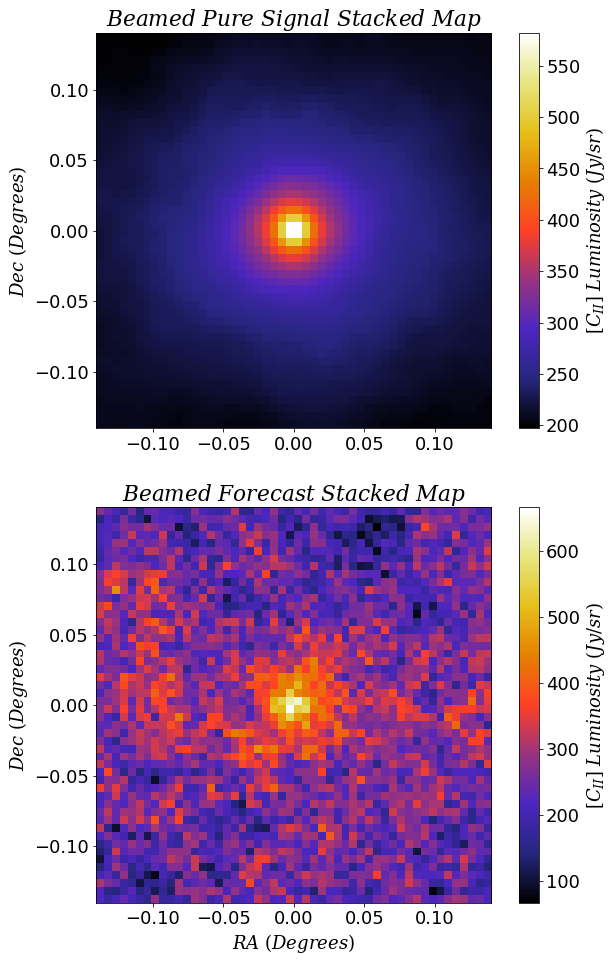

In [10]:
fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(pure_stack, beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(noisy_stack, cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')

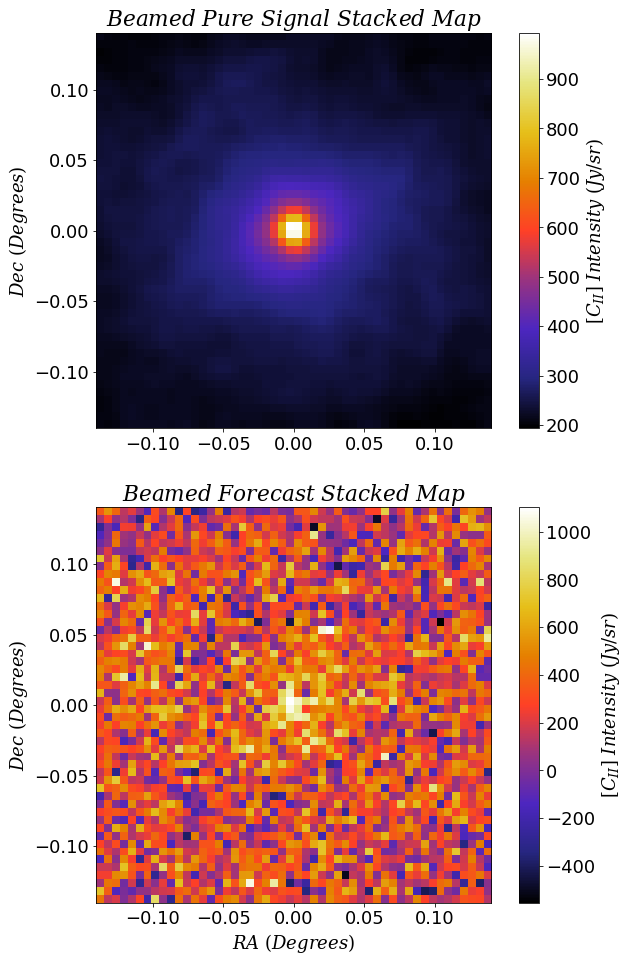

In [15]:
fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(pure_stack_lbg, beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(noisy_stack_lbg, cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')

In [402]:
np.shape(np.average(pure_map, axis = 0))

(50, 50)

In [7]:
np.shape(draws)

(131346,)

In [11]:
pure_map_t = 1*pure_map
pure_map_t[:, :, :] = 1

In [83]:
a = np.array([1, 2, 3])
b = np.array([2])

In [85]:
b*a

array([2, 4, 6])

In [86]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])

In [88]:
a * b

array([[ 0.,  0.,  0.],
       [10., 20., 30.],
       [20., 40., 60.],
       [30., 60., 90.]])

In [90]:
np.shape(pure_map_t[0])

(50, 50)

In [12]:
draws = np.reshape(draws, (len(draws), 1, 1))
new_draws = draws*pure_map_t

In [13]:
new_draws = draws*pure_map_t

In [14]:
np.shape(new_draws)

(131346, 50, 50)

In [15]:
new_draws[2]

masked_array(
  data=[[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
        ...,
        [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20)

In [99]:
draws

array([[[0]],

       [[0]],

       [[3]],

       ...,

       [[0]],

       [[0]],

       [[0]]])